# Tensorflow Project 

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.



## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
df.head()

Image.Var  Image.Skew  Image.Curt  Entropy  Class
0    3.62160      8.6661     -2.8073 -0.44699      0
1    4.54590      8.1674     -2.4586 -1.46210      0
2    3.86600     -2.6383      1.9242  0.10645      0
3    3.45660      9.5228     -4.0112 -3.59440      0
4    0.32924     -4.4552      4.5718 -0.98880      0

In [4]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum()

Image.Var     0
Image.Skew    0
Image.Curt    0
Entropy       0
Class         0
dtype: int64

## EDA

** Import seaborn and set matplolib inline for viewing **

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

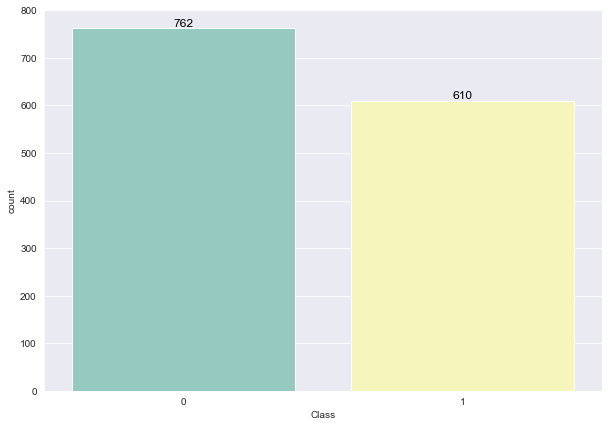

In [7]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
ax = sns.countplot(df['Class'], palette = "Set3")
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

/Users/jamiezeng/anaconda2/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jamiezeng/anaconda2/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


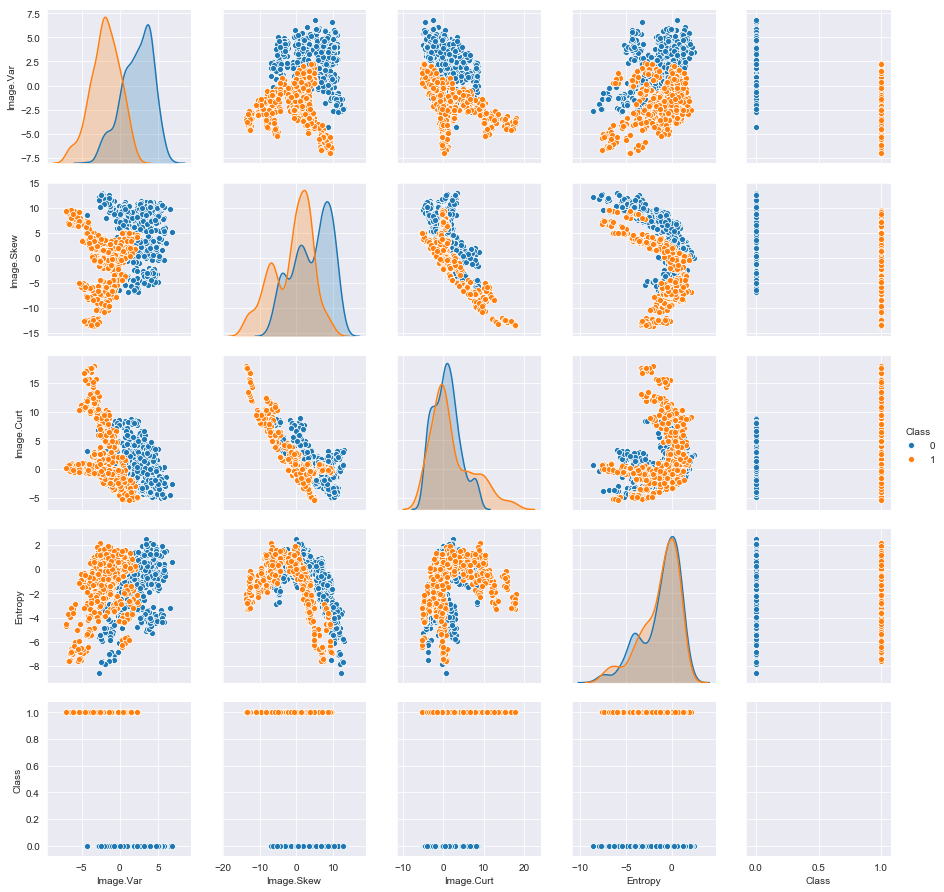

In [8]:
sns.pairplot(df, hue='Class')

## Data Preparation 


### Standard Scaling



**Create a StandardScaler() object called scaler.**

In [9]:
from sklearn.preprocessing import StandardScaler

**Fit scaler to the features.**

In [10]:
ss = StandardScaler()
ss.fit(df.drop('Class', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [11]:
scaled_features = ss.transform(df.drop('Class', axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [26]:
df_feat = pd.DataFrame(scaled_features, columns = ['Image.Var','Image.Skew','Image.Curt','Entropy'])

In [27]:
df_feat.head()

Image.Var  Image.Skew  Image.Curt   Entropy
0   1.121806    1.149455   -0.975970  0.354561
1   1.447066    1.064453   -0.895036 -0.128767
2   1.207810   -0.777352    0.122218  0.618073
3   1.063742    1.295478   -1.255397 -1.144029
4  -0.036772   -1.087038    0.736730  0.096587

## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [28]:
X = df_feat

In [29]:
y = df['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Tensorflow

In [32]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [33]:
df_feat.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [34]:
image_var = tf.feature_column.numeric_column('Image.Var')
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy = tf.feature_column.numeric_column('Entropy')

In [39]:
feat_cols = [image_var, image_skew, image_curt, entropy]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [40]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=2, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/8p/t_jl6drn1gx57wvwvfs4x4_w0000gn/T/tmpy1ehx3g5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1ba4d668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. **

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

** Train classifier to the input function. **


In [42]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/8p/t_jl6drn1gx57wvwvfs4x4_w0000gn/T/tmpy1ehx3g5/model.ckpt.
INFO:tensorflow:loss = 7.0514016, step = 1
INFO:tensorflow:global_step/sec: 413.407
INFO:tensorflow:loss = 0.033448625, step = 101 (0.245 sec)
INFO:tensorflow:global_step/sec: 541.041
INFO:tensorflow:loss = 0.037620913, step = 201 (0.185 sec)
INFO:tensorflow:global_step/sec: 554.222
INFO:tensorflow:loss = 0.062795326, step = 301 (0.182 sec)
INFO:tensorflow:global_step/sec: 567.231
INFO:tensorflow:loss = 0.057565764, step = 401 (0.173 sec)
INFO:tensorflow:Saving checkpoints for 460 into /var/folders/8p/t_jl6drn1gx57wvwvfs4x4_w0000gn/T/tmpy1ehx3g5/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00051886163.


## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [43]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [44]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/8p/t_jl6drn1gx57wvwvfs4x4_w0000gn/T/tmpy1ehx3g5/model.ckpt-460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [45]:
note_predictions[0]

{'logits': array([-12.954158], dtype=float32),
 'logistic': array([2.366354e-06], dtype=float32),
 'probabilities': array([9.999976e-01, 2.366354e-06], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object)}

In [46]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

** Create a classification report and a Confusion Matrix. **

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(y_test,final_preds))

[[257   0]
 [  0 196]]


In [50]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       196

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



## Optional Comparison

**Use SciKit Learn to Create a Logistic Regression Model and compare the confusion matrix and classification report to the DNN model**

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lg = LogisticRegression()

In [61]:
lg.fit(X_train, y_train)

/Users/jamiezeng/anaconda2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
predic = lg.predict(X_test)

In [63]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.97      0.99      0.98       196

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



In [64]:
print(confusion_matrix(y_test, predic))

[[250   7]
 [  2 194]]
